Análisis Exploratorio con Pandas
Cargar el dataset con pandas.
Limpiar datos (valores nulos, tipos de datos, duplicados).
Analizar estadísticas con .describe().
Crear columnas nuevas como Mes, Año, Ganancias Totales.

In [10]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("ventas.csv", parse_dates=["Fecha"])

# Crear nuevas columnas
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year

# Ver las primeras filas
print(df.head())


       Fecha  Producto  Categoría  Cantidad  Precio Unitario  Total Venta  \
0 2024-05-15  Pantalón       Ropa         4           434.56      1738.24   
1 2024-06-19      Mesa      Hogar         4           442.22      1768.88   
2 2024-08-04       Pan  Alimentos         7           112.31       786.17   
3 2024-09-04    Cereal  Alimentos         8           372.02      2976.16   
4 2025-01-24     Queso  Alimentos         5           231.21      1156.05   

   Mes   Año  
0    5  2024  
1    6  2024  
2    8  2024  
3    9  2024  
4    1  2025  


Visualización con Matplotlib y Seaborn
Ventas por categoría.
Evolución de ventas a lo largo del tiempo.
Producto más vendido.

C:\Users\USER\AppData\Local\Temp\ipykernel_10744\2419044390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_categoria.index, y=ventas_categoria.values, palette="viridis")


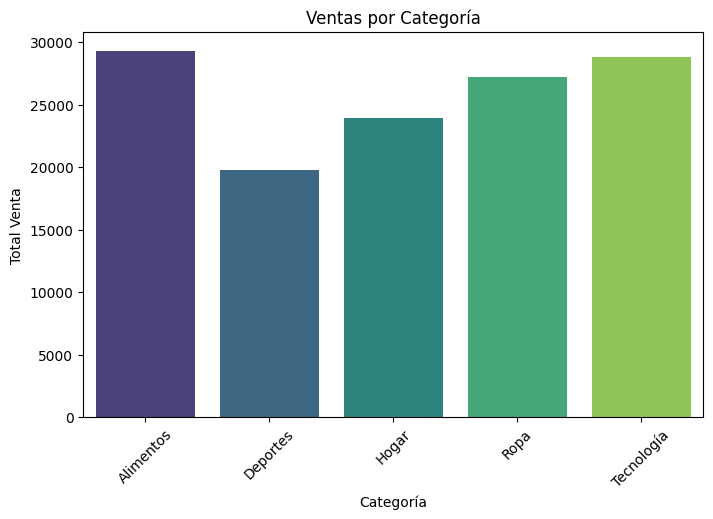

C:\Users\USER\AppData\Local\Temp\ipykernel_10744\2419044390.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_categoria.index, y=ventas_categoria.values, palette="viridis")


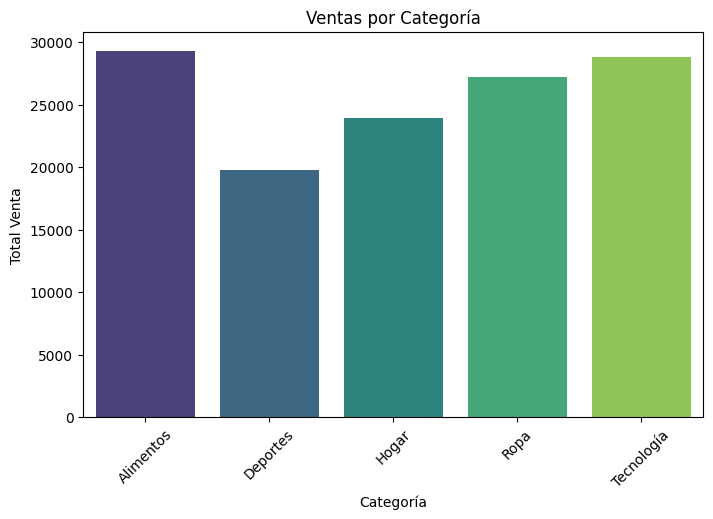

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar ventas por categoría
ventas_categoria = df.groupby("Categoría")["Total Venta"].sum()

# Crear gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=ventas_categoria.index, y=ventas_categoria.values, palette="viridis")
plt.title("Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Total Venta")
plt.xticks(rotation=45)
plt.show()


# Agrupar ventas por categoría
ventas_categoria = df.groupby("Categoría")["Total Venta"].sum()

# Crear gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=ventas_categoria.index, y=ventas_categoria.values, palette="viridis")
plt.title("Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Total Venta")
plt.xticks(rotation=45)
plt.show()


Predicción de Ventas (Regresión)
Usaremos Scikit-learn para hacer una predicción simple.
Entrenamos un modelo de regresión lineal para prever ventas futuras.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Cargar los datos
df = pd.read_csv("ventas.csv")  # Asegúrate de que el archivo esté en el mismo directorio o especifica la ruta correcta

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Preparar datos para la predicción
df["Mes_Num"] = df["Fecha"].dt.month  # Extraer el número del mes
X = df[["Mes_Num"]]  # Variables predictoras (mes)
y = df["Total Venta"]  # Variable objetivo (total de ventas)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir ventas futuras para febrero (Mes 2)
nuevo_mes = pd.DataFrame([[2]], columns=["Mes_Num"])  # Convertir a DataFrame para mantener consistencia
ventas_futuras = modelo.predict(nuevo_mes)

# Mostrar la predicción
print(f"Predicción de ventas para febrero: {ventas_futuras[0]:.2f}")


Predicción de ventas para febrero: 1290.78
